In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import truncnorm

import random

## 1) Seleccion del Dataset

Este conjunto de datos se centra en vinos, específicamente en vinos rojos. Contiene información recopilada a través de web scraping desde Vivino.com, un sitio web de reseñas de vinos.

https://www.kaggle.com/datasets/budnyak/wine-rating-and-price/data?select=Red.csv

In [410]:
df= pd.read_csv('Red.csv')

In [412]:
df.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year'],
      dtype='object')

In [8]:
df.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

## 2) Análisis Exploratorio de Datos (EDA)

In [300]:
df.describe()

,Rating,NumberOfRatings,Price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


buscando valores nullos en el dataset

In [304]:
df.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64


 Distribución de la categoría: Country


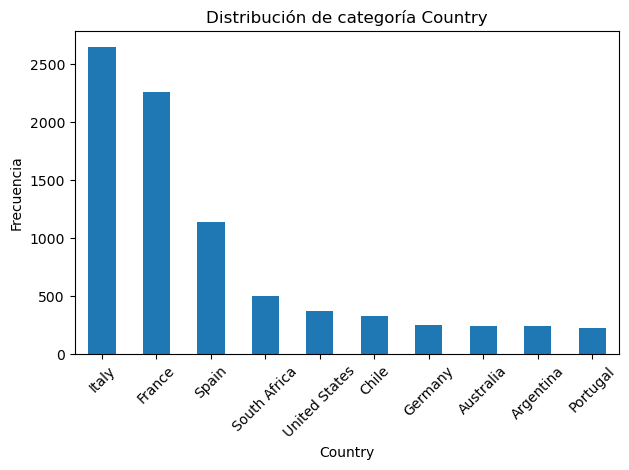


 Distribución de la categoría: Winery


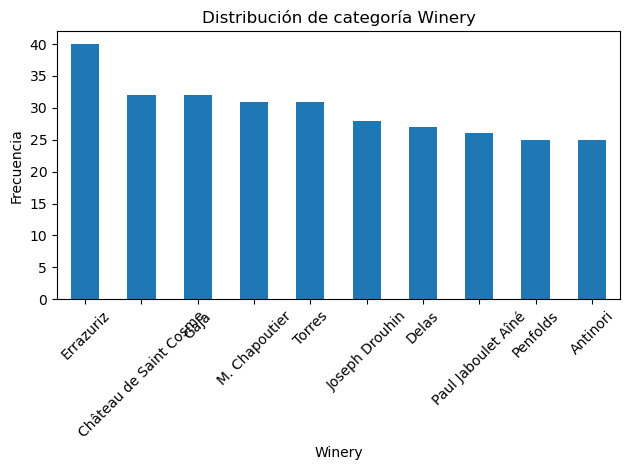


 Distribución de la categoría: Year


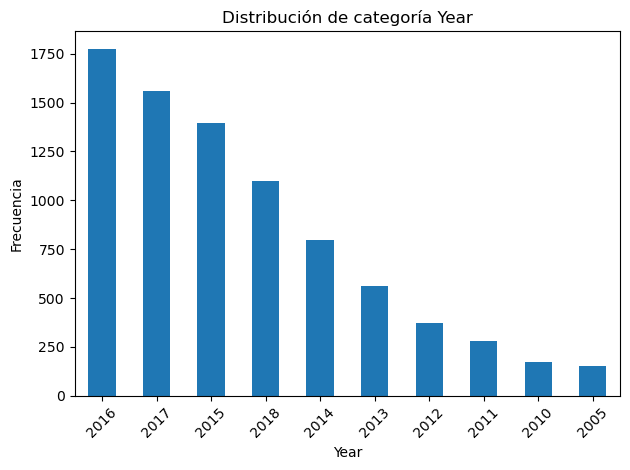

In [312]:
for c in cat_cols:
    print(f"\n Distribución de la categoría: {c}")
    df[c].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribución de categoría {c}')
    plt.ylabel('Frecuencia')
    plt.xlabel(c)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

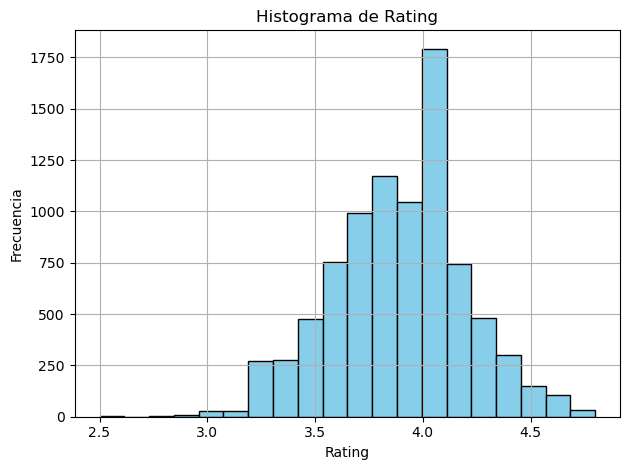

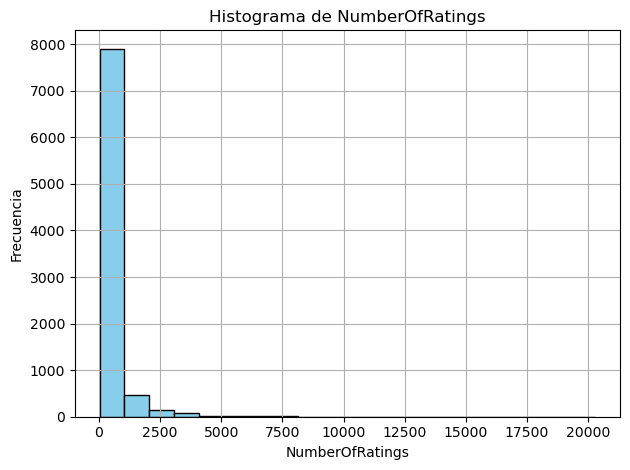

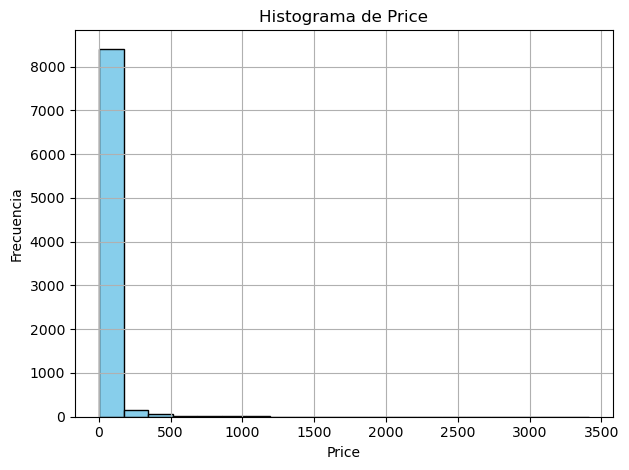

In [328]:
for c in num_cols:
    plt.hist(df[c].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {c}')
    plt.xlabel(c)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [350]:
df=df.loc[~(df["Year"]=="N.V."),:]

convirtiendo "Year" en una variable numerica para su análisis

In [352]:
if 'Year' in df.columns:
    temp_df = df.copy()
    temp_df['Year'] = pd.to_numeric(temp_df['Year'], errors='coerce')
    num_cols_cor = temp_df.select_dtypes(include=np.number).columns.tolist()

In [354]:
df[num_cols_cor].corr()

,Rating,NumberOfRatings,Price,Year
Rating,1.000000,0.070317,0.451251,-0.343491
NumberOfRatings,0.070317,1.000000,0.005823,-0.025555
Price,0.451251,0.005823,1.000000,-0.363914
Year,-0.343491,-0.025555,-0.363914,1.000000


**Correlaciones encontradas:**
- Mayor año, menor precio y rating
- Mayor rating, mayor precio


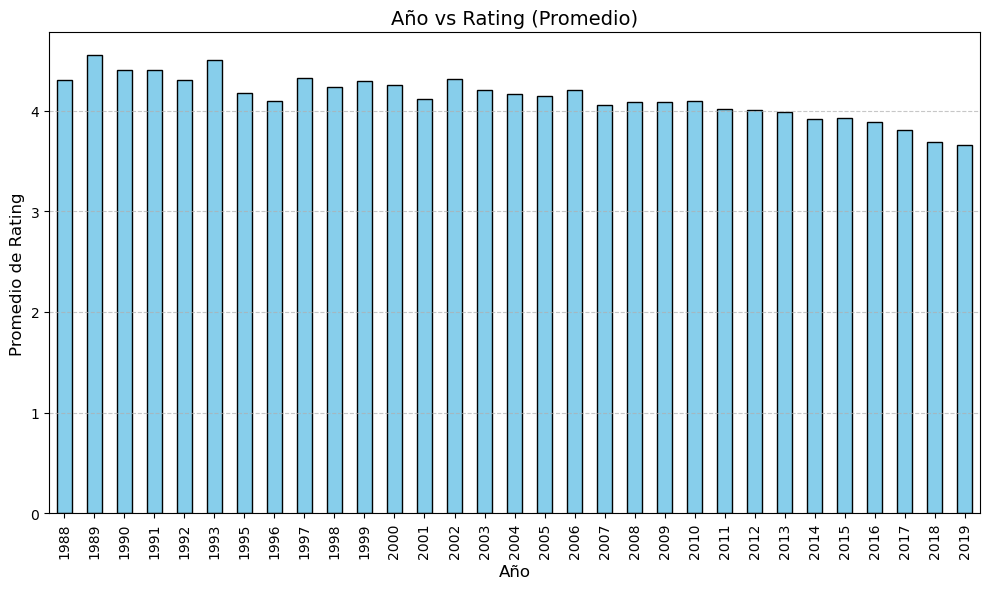

In [358]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Rating'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Año vs Rating (Promedio)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Rating', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

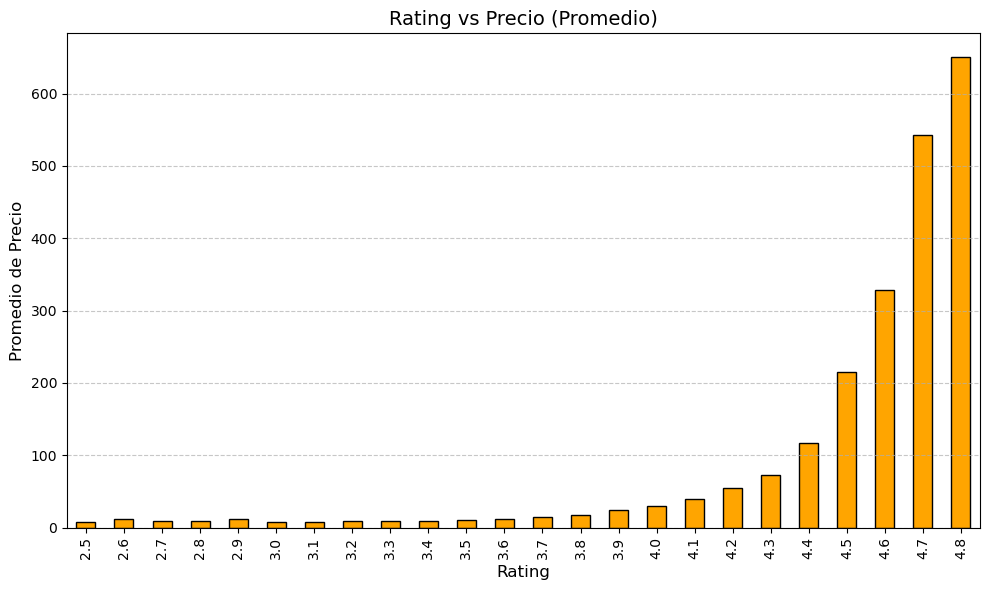

In [360]:
plt.figure(figsize=(10, 6))
df.groupby('Rating')['Price'].mean().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Rating vs Precio (Promedio)', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Promedio de Precio', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

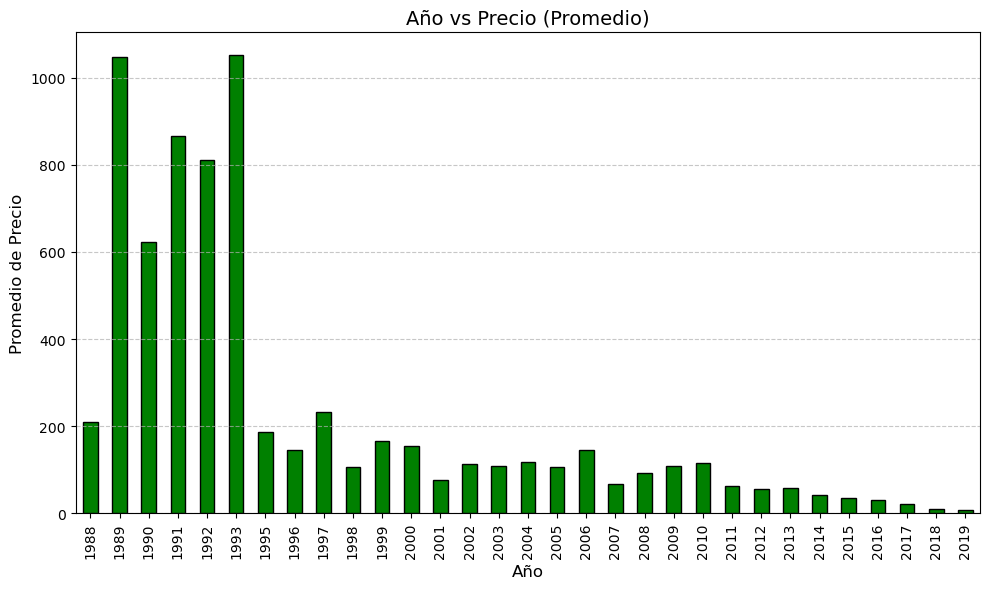

In [363]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Price'].mean().plot(kind='bar', color='green', edgecolor='black')
plt.title('Año vs Precio (Promedio)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Precio', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

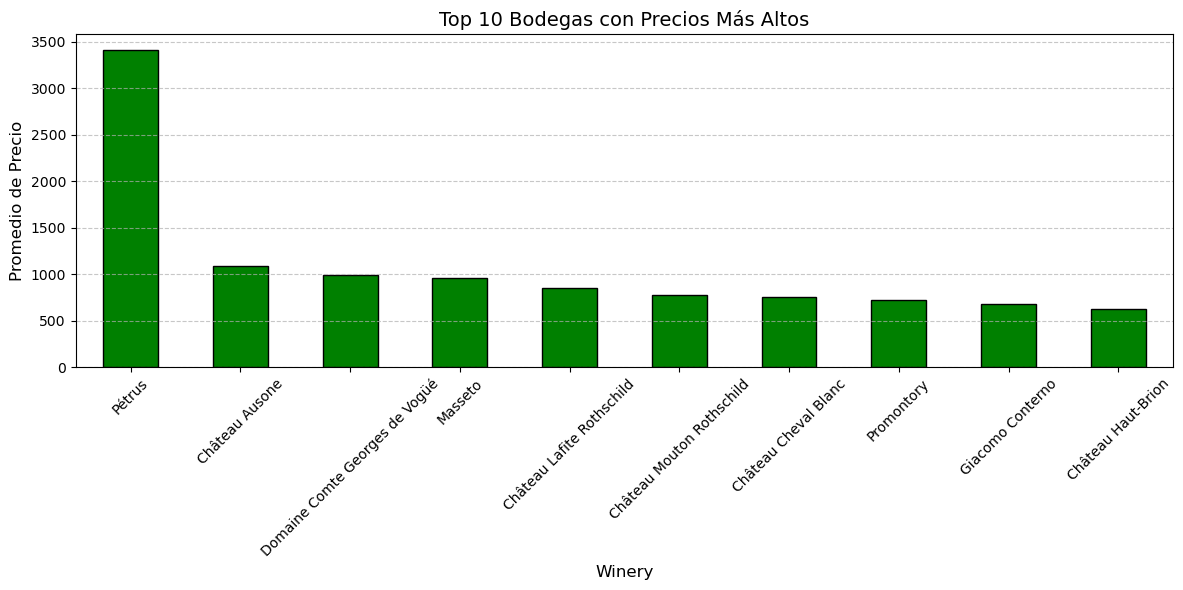

In [371]:
top_wineries = df.groupby('Winery')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_wineries.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Bodegas con Precios Más Altos', fontsize=14)
plt.xlabel('Winery', fontsize=12)
plt.ylabel('Promedio de Precio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

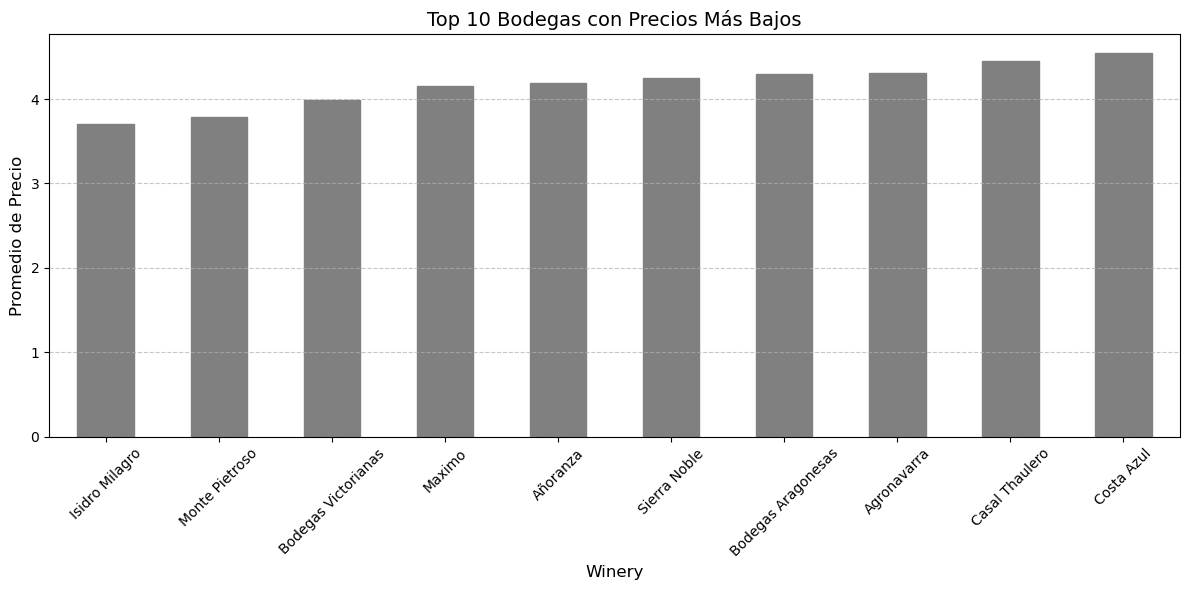

In [385]:
bottom_wineries = df.groupby('Winery')['Price'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 6))
bottom_wineries.plot(kind='bar', color='gray', edgecolor='gray')
plt.title('Top 10 Bodegas con Precios Más Bajos', fontsize=14)
plt.xlabel('Winery', fontsize=12)
plt.ylabel('Promedio de Precio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [418]:
num_cols = [c for c in df.columns if df[c].dtype in ['float64', 'int64']]


In [420]:
cat_cols = [c for c in df.columns if df[c].dtype == 'O']

In [422]:
cat_cols =['Country','Winery', 'Year']

In [45]:
num_cols

['Rating', 'NumberOfRatings', 'Price']

In [544]:
probs = df.groupby(cat_cols, as_index=False).size() 
probs.columns = cat_cols + ['frecuencia']
probs['probs'] = probs['frecuencia'] / df.shape[0]


In [546]:
probs

,Country,Winery,Year,frecuencia,probs
0,Argentina,Achaval-Ferrer,2013,1,0.000115
1,Argentina,Achaval-Ferrer,2014,1,0.000115
2,Argentina,Alamos,2016,1,0.000115
3,Argentina,Alamos,2018,1,0.000115
4,Argentina,Alamos,2019,2,0.000231
...,...,...,...,...,...
6265,United States,Woodhaven,2018,1,0.000115
6266,United States,Wölffer Estate,2016,1,0.000115
6267,Uruguay,Bodega Garzón,2016,2,0.000231
6268,Uruguay,Bodega Garzón,2018,1,0.000115


## 3) Simulación del Dataset Expandido

In [414]:
random.seed(2003)

In [426]:
transformacion = {}
columnas = []

for c in num_cols:
    transformacion[c] = [ 
        ('lower_bound', lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))),
        ('upper_bound', lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
    ]
    columnas.append(f"{c}_lower_bound")
    columnas.append(f"{c}_upper_bound")

df_resultados = df.groupby(cat_cols, as_index=False).agg(transformacion)


In [428]:
df_resultados.columns = cat_cols + columnas

In [430]:
df_bound = df.merge(
    df_resultados,
    on=cat_cols,
    how="inner"  
)

In [432]:
df_bound.shape[0]

8666

In [436]:
atipicos = pd.DataFrame({
    "categoria": num_cols
}); 

cantidad_upperbound = []
cantidad_lowerbound = []

In [438]:
for c in num_cols:
    
    
    cantidad_lowerbound.append(
        df_bound.loc[(df_bound[c] < df_bound[f"{c}_lower_bound"]), :].shape[0]
    )

    cantidad_upperbound.append(
        df_bound.loc[(df_bound[c] > df_bound[f"{c}_upper_bound"]), :].shape[0]
    )


atipicos["atipicos_sup"] = cantidad_upperbound
atipicos["atipicos_low"] = cantidad_lowerbound
    

In [440]:
atipicos

,categoria,atipicos_sup,atipicos_low
0,Rating,28,33
1,NumberOfRatings,92,7
2,Price,75,23


In [442]:
for num_col in num_cols:
    df_bound = df_bound.loc[
        ~((df_bound[num_col] > df_bound[f"{num_col}_upper_bound"]) | 
          (df_bound[num_col] < df_bound[f"{num_col}_lower_bound"])), 
        :
    ]


In [444]:
df_bound.shape[0]

8436

In [446]:
df_clean = df_bound.loc[:,cat_cols +num_cols]

In [448]:
summ_aggregations = {}
cols_summ = []
for num_col in num_cols:
    summ_aggregations[num_col] = [ "min" , "max" , "mean" , "std" ]
    cols_summ.append( f"{num_col}_min" )
    cols_summ.append( f"{num_col}_max" )
    cols_summ.append( f"{num_col}_mean" )
    cols_summ.append( f"{num_col}_std" )

In [450]:
df_summ = df_clean.groupby(
    cat_cols
    , as_index=False
).agg(summ_aggregations)
df_summ.columns = cat_cols +  cols_summ

In [476]:
cantidad = 100000

In [454]:
ids = np.random.choice(
    probs.index,
    size=cantidad,
    p=probs["frecuencia"].to_numpy() / probs["frecuencia"].sum()
)


In [460]:
for col in df_summ.columns:
    if col.endswith("_std"):
        invalid_values = df_summ[
            (df_summ[col] <= 0) | (df_summ[col].isna())
        ]
        if not invalid_values.empty:
            print(f"\n Valores inválidos en: {col}")
            print(invalid_values[[col] + cat_cols])


In [464]:
for col in df_summ.columns:
    if col.endswith("_std"):
        df_summ[col] = df_summ[col].fillna(1e-6)
        df_summ.loc[df_summ[col] <= 0, col] = 1e-6


In [466]:
def trunc_vector(min_val, max_val, media, desv_std,size):
    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    
    muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=size)
    return muestras

In [468]:
def safe_trunc_vector(min_val, max_val, mean, std, size):
    if std <= 0 or pd.isna(std):
        std = 1e-6
    if min_val >= max_val:
        max_val = min_val + 1e-6
    if not (min_val <= mean <= max_val):
        mean = (min_val + max_val) / 2

    return trunc_vector(min_val, max_val, mean, std, size)


In [484]:
df_expandido = pd.DataFrame()
for i in probs.index:
    setting = {
        "id": ids[ ids == i ]
    }
    for c in num_cols:
        setting[c] = safe_trunc_vector( 
            df_summ.iloc[i][f"{c}_min"],
            df_summ.iloc[i][f"{c}_max"],
            df_summ.iloc[i][f"{c}_mean"],
            df_summ.iloc[i][f"{c}_std"],
            len(ids[ids == i])
        )
    tmp = pd.DataFrame(setting)
    df_expandido = pd.concat([df_expandido, tmp])


## 4) Análisis Comparativo (EDA del Dataset Expandido)

In [472]:
df.describe()

,Rating,NumberOfRatings,Price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


In [486]:
df_expandido.describe()

,id,Rating,NumberOfRatings,Price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,3126.721940,3.889331,411.336354,39.147127
std,1821.908707,0.296014,824.858788,83.517794
min,0.000000,2.500000,25.000000,3.550000
25%,1614.000000,3.700000,75.000001,10.992943
50%,3172.000000,3.900000,177.000001,18.900001
75%,4686.000000,4.100000,427.000000,38.500000
max,6269.000000,4.800001,19489.000001,3410.790001


In [488]:
probs["id"] = probs.index

In [496]:
df_expandido = probs.loc[:,["id"]+cat_cols].merge(
    df_expandido,
    on=["id"],
    how="inner"
)

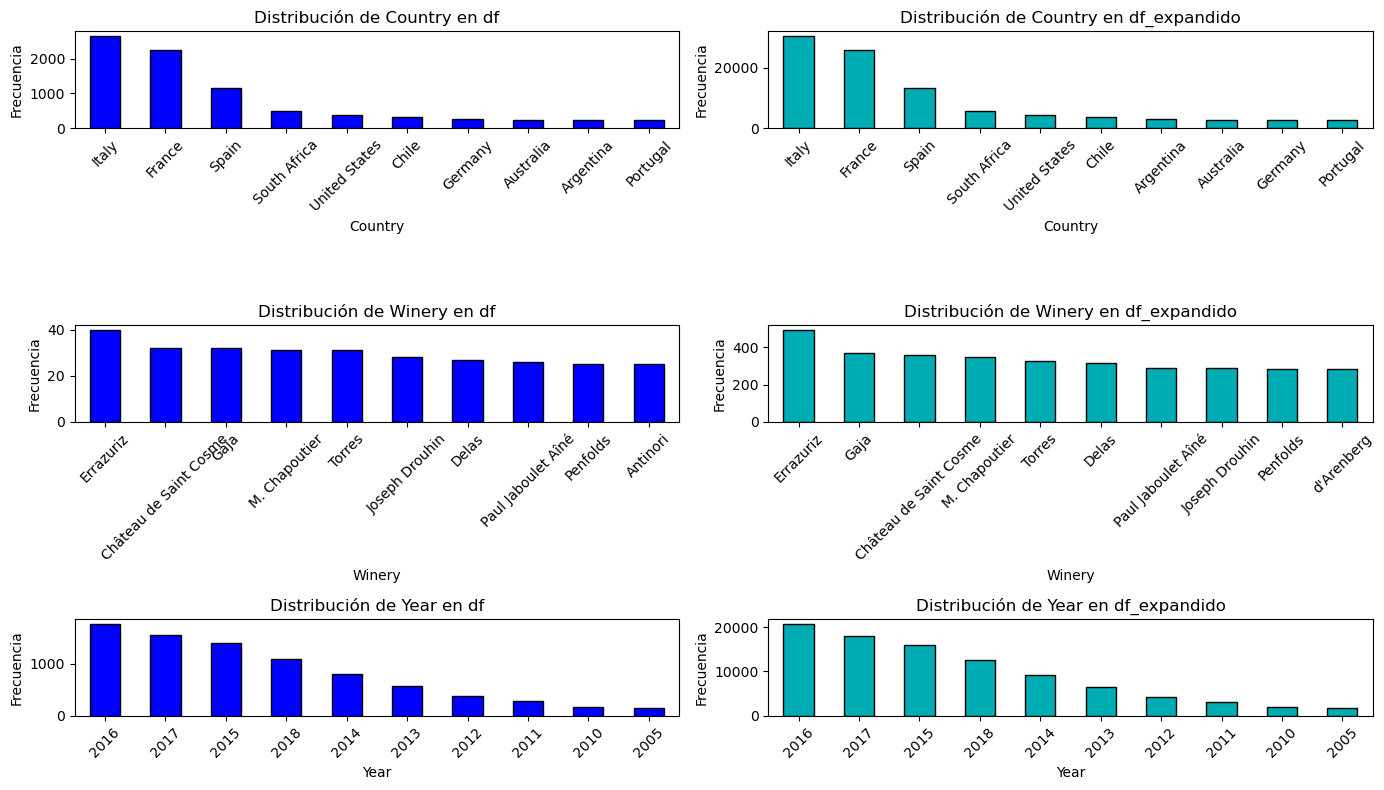

In [512]:
plt.figure(figsize=(14, 8))
for i, c in enumerate(cat_cols):
    # Subgráfico 1: Distribución en df
    plt.subplot(len(cat_cols), 2, 2*i+1)
    df[c].value_counts().head(10).plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f'Distribución de {c} en df')
    plt.ylabel('Frecuencia')
    plt.xlabel(c)
    plt.xticks(rotation=45)
    
    # Subgráfico 2: Distribución en df_expandido
    plt.subplot(len(cat_cols), 2, 2*i+2)
    df_expandido[c].value_counts().head(10).plot(kind='bar', color='#00ACB3', edgecolor='black')
    plt.title(f'Distribución de {c} en df_expandido')
    plt.ylabel('Frecuencia')
    plt.xlabel(c)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


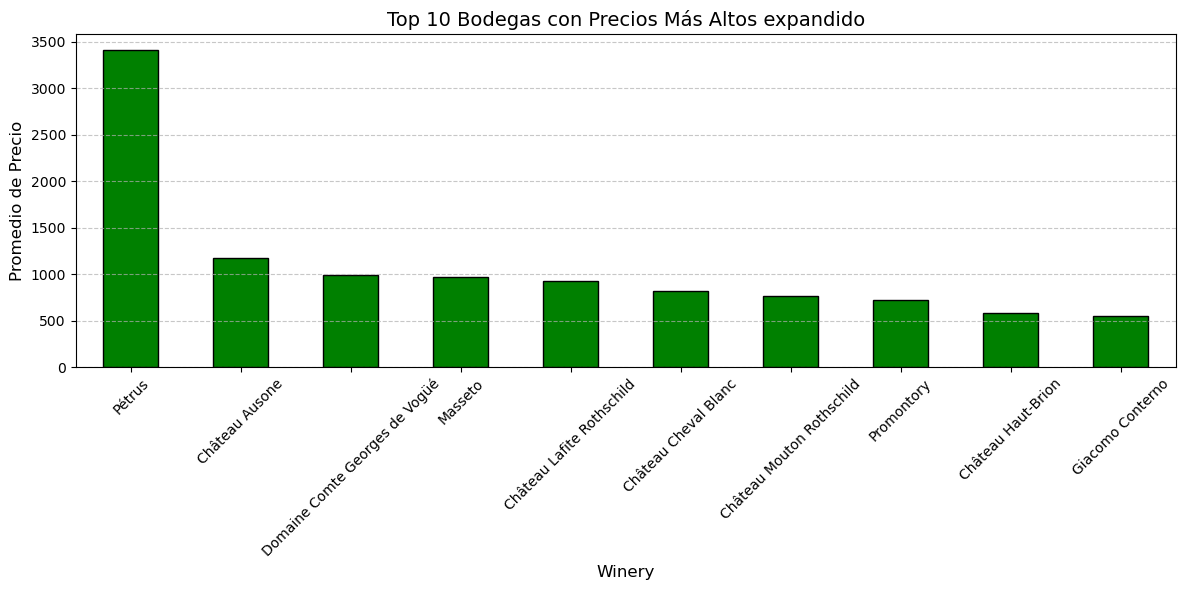

In [595]:
top_wineries_exp = df_expandido.groupby('Winery')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_wineries_exp.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Bodegas con Precios Más Altos expandido', fontsize=14)
plt.xlabel('Winery', fontsize=12)
plt.ylabel('Promedio de Precio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [522]:
if 'Year' in df.columns:
    temp_df_exp = df_expandido.copy()
    temp_df_exp['Year'] = pd.to_numeric(temp_df_exp['Year'], errors='coerce')
    num_cols_cor = temp_df_exp.select_dtypes(include=np.number).columns.tolist()

In [524]:
temp_df_exp[num_cols_cor].corr()

,id,Year,Rating,NumberOfRatings,Price
id,1.000000,0.077096,0.011631,0.071545,-0.083414
Year,0.077096,1.000000,-0.362615,-0.036116,-0.375472
Rating,0.011631,-0.362615,1.000000,0.108231,0.446158
NumberOfRatings,0.071545,-0.036116,0.108231,1.000000,0.029238
Price,-0.083414,-0.375472,0.446158,0.029238,1.000000


In [548]:
probs_ext = df_expandido.groupby(cat_cols, as_index=False).size() 
probs_ext.columns = cat_cols + ['frecuencia']
probs_ext['probs'] = probs_ext['frecuencia'] / df_expandido.shape[0]


In [565]:
probs_ext

,Country,Winery,Year,frecuencia,probs
0,Argentina,Achaval-Ferrer,2013,18,0.00018
1,Argentina,Achaval-Ferrer,2014,10,0.00010
2,Argentina,Alamos,2016,11,0.00011
3,Argentina,Alamos,2018,20,0.00020
4,Argentina,Alamos,2019,18,0.00018
...,...,...,...,...,...
6265,United States,Woodhaven,2018,12,0.00012
6266,United States,Wölffer Estate,2016,8,0.00008
6267,Uruguay,Bodega Garzón,2016,25,0.00025
6268,Uruguay,Bodega Garzón,2018,12,0.00012


In [ ]:
probs = probs.drop("id", axis=1)


In [563]:
probs

,Country,Winery,Year,frecuencia,probs
0,Argentina,Achaval-Ferrer,2013,1,0.000115
1,Argentina,Achaval-Ferrer,2014,1,0.000115
2,Argentina,Alamos,2016,1,0.000115
3,Argentina,Alamos,2018,1,0.000115
4,Argentina,Alamos,2019,2,0.000231
...,...,...,...,...,...
6265,United States,Woodhaven,2018,1,0.000115
6266,United States,Wölffer Estate,2016,1,0.000115
6267,Uruguay,Bodega Garzón,2016,2,0.000231
6268,Uruguay,Bodega Garzón,2018,1,0.000115


In [567]:
df_diff = pd.DataFrame()

In [581]:
df_diff['probs_diff'] = abs(probs['probs'] - probs_ext['probs'])

In [583]:
df_diff.describe()

,probs_diff
count,6.270000e+03
mean,3.127379e-05
std,2.556889e-05
min,7.869836e-07
25%,1.460651e-05
50%,2.539349e-05
75%,4.460651e-05
max,3.131479e-04


## Conclusiones

La simulación ha demostrado ser efectiva para generar datos adicionales que mantienen la coherencia con las propiedades estadísticas del conjunto de datos original. La media, la desviación estándar y la distribución de los datos, se han mantenido dentro de rangos esperados, lo que asegura que los resultados no se vean significativamente alterados.
